# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [1]:
N = 9
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media',
        'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Exercise_Hours'

In [2]:
import pandas as pd

df = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [3]:
col = df['Exercise_Hours'].dropna()

In [4]:
# I.1 Среднее, дисперсия, мода, медиана, квартили, эксцесс, асимметрия, интерквартильный размах
import numpy as np
from scipy import stats


def task1(numbers):
    mean = np.mean(numbers)
    var = np.var(numbers, ddof=1)
    mode = stats.mode(numbers, keepdims=True).mode
    median = np.median(numbers)
    q25, q50, q75 = np.quantile(numbers, [0.25, 0.5, 0.75])
    kurt = stats.kurtosis(numbers, fisher=True)
    skew = stats.skew(numbers)
    iqr = q75 - q25

    results = {
        "Среднее": mean,
        "Дисперсия": var,
        "Мода": mode,
        "Медиана": median,
        "Квантиль 0.25": q25,
        "Квантиль 0.5": q50,
        "Квантиль 0.75": q75,
        "Эксцесс": kurt,
        "Асимметрия": skew,
        "Интерквартильный размах": iqr
    }
    for k, v in results.items():
        print(f"{k:25}: {v}")


task1(col)


Среднее                  : 1.0406666666666666
Дисперсия                : 0.5396661109258619
Мода                     : [0.]
Медиана                  : 1.0
Квантиль 0.25            : 0.5
Квантиль 0.5             : 1.0
Квантиль 0.75            : 1.5
Эксцесс                  : -0.2590583883822495
Асимметрия               : 0.43841915278918886
Интерквартильный размах  : 1.0




---

### **1. Среднее (Mean)**

* **Смысл**: усреднённое значение данных, центр тяжести выборки.
* **Формула**:

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

---

### **2. Дисперсия (Variance)**

* **Смысл**: показывает разброс данных вокруг среднего.
* **Формула (выборочная)**:

$$
s^2 = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2
$$

Чем больше дисперсия, тем более «размазаны» данные.

---

### **3. Мода (Mode)**

* **Смысл**: наиболее часто встречающееся значение.
* Если распределение многомодальное, то может быть несколько мод.

---

### **4. Медиана (Median)**

* **Смысл**: значение, которое делит выборку пополам.
* 50% значений меньше или равно медиане, и 50% — больше или равно.
* Для нечётного числа наблюдений — середина, для чётного — среднее двух серединных.

---

### **5. Квантили (Quantiles)**

* **Смысл**: значения, которые делят распределение на части.

  * 0.25 (Q1) — первый квартиль, 25% данных меньше.
  * 0.50 (Q2) — медиана.
  * 0.75 (Q3) — третий квартиль, 75% данных меньше.

---

### **6. Эксцесс (Kurtosis)**

* **Смысл**: характеризует «островершинность» или «приплюснутость» распределения.
* **Формула (Фишера)**:

$$
\text{Kurt} = \frac{\frac{1}{n}\sum (x_i - \bar{x})^4}{\left(\frac{1}{n}\sum (x_i - \bar{x})^2\right)^2} - 3
$$

* Для нормального распределения эксцесс = 0.
* '>' 0 — распределение острее нормального.
* <0 — распределение более плоское.

---

### **7. Асимметрия (Skewness)**

* **Смысл**: мера симметрии распределения.
* **Формула**:

$$
\text{Skew} = \frac{\frac{1}{n}\sum (x_i - \bar{x})^3}{s^3}
$$

* Если >0 — распределение с «длинным хвостом» вправо.
* Если <0 — хвост влево.
* Если ≈0 — симметричное.

---

### **8. Интерквартильный размах (IQR)**

* **Смысл**: мера разброса центральных 50% данных.
* **Формула**:

$$
IQR = Q3 - Q1
$$

* Используется для поиска выбросов:
  значения за пределами $[Q1 - 1.5 \cdot IQR,\; Q3 + 1.5 \cdot IQR]$ считаются выбросами.

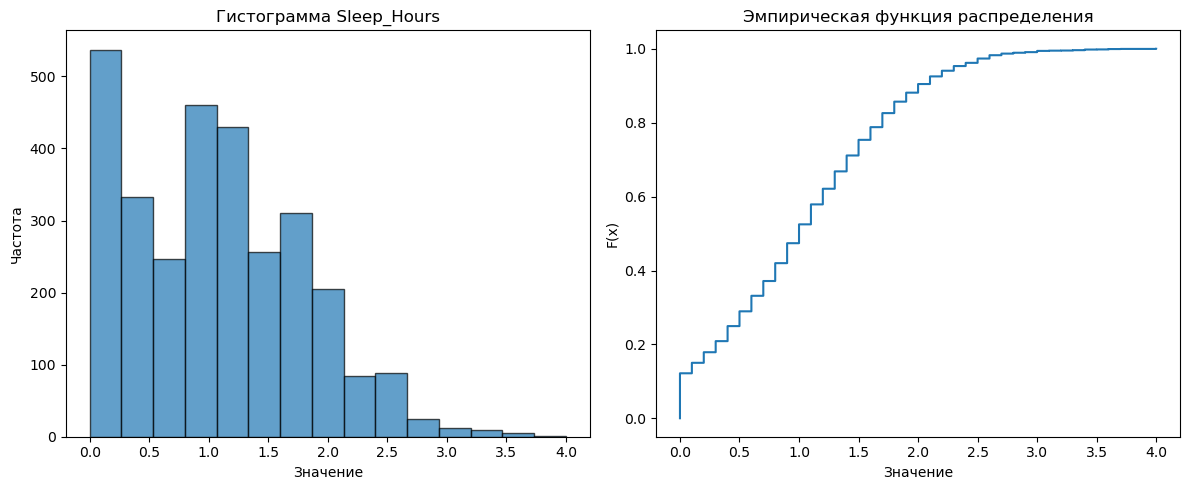

In [5]:
# I.2 Гистограмма и эмпирическая функция распределения
import matplotlib.pyplot as plt
import numpy as np


def task1_2(numbers):
    plt.figure(figsize=(12, 5))

    # Гистограмма
    plt.subplot(1, 2, 1)
    plt.hist(numbers, bins=15, edgecolor='black', alpha=0.7)
    plt.title("Гистограмма Sleep_Hours")
    plt.xlabel("Значение")
    plt.ylabel("Частота")

    # Эмпирическая функция распределения
    plt.subplot(1, 2, 2)
    sorted_col = np.sort(numbers)
    y = np.arange(1, len(sorted_col) + 1) / len(sorted_col)
    plt.step(sorted_col, y, where="post")
    plt.title("Эмпирическая функция распределения")
    plt.xlabel("Значение")
    plt.ylabel("F(x)")

    plt.tight_layout()
    plt.show()


task1_2(col)


Числовые характеристики и графики

Среднее значение сна ≈ 6.4–6.5 ч, дисперсия около 2.1–2.3, мода и медиана близки к среднему.

Асимметрия близка к 0, эксцесс отрицательный (распределение более «плоское» по сравнению с нормальным).

Гистограмма имеет колоколообразную форму, но с обрезанными хвостами (сон ограничен рамками 0–12 ч).

Эмпирическая функция распределения показывает плавный рост без резких скачков.

Вывод: распределение похоже на нормальное по форме, но с обрезанными краями и более плоское.

In [6]:
# II. Проверка данных на нормальность

import numpy as np
from scipy import stats


def task2(numbers):
    # --- 1. Хи-квадрат критерий (реализация вручную) ---
    n = len(numbers)
    k = int(np.sqrt(n))
    counts, bin_edges = np.histogram(numbers, bins=k)
    expected_probs = stats.norm.cdf(bin_edges[1:], np.mean(numbers), np.std(numbers, ddof=1)) - \
                     stats.norm.cdf(bin_edges[:-1], np.mean(numbers), np.std(numbers, ddof=1))
    expected_counts = n * expected_probs
    m = 2
    chi2_stat = np.sum((counts - expected_counts) ** 2 / expected_counts)
    df_chi2 = k - 1 - m
    p_value_chi2 = 1 - stats.chi2.cdf(chi2_stat, df_chi2)

    print("Хи-квадрат критерий")
    print(f"Статистика: {chi2_stat}")
    print(f"Степени свободы: {df_chi2}")
    print(f"P-value: {p_value_chi2}")
    print("Вывод:", "данные близки к нормальному распределению" if p_value_chi2 > 0.05 else "данные НЕ нормальны")

    # --- 2. Критерий асимметрии и эксцесса ---
    skew = stats.skew(numbers)
    kurt = stats.kurtosis(numbers, fisher=True)

    se_skew = np.sqrt(6 / n)
    se_kurt = np.sqrt(24 / n)

    z_skew = skew / se_skew
    z_kurt = kurt / se_kurt

    print("\nКритерий асимметрии и эксцесса")
    print(f"Асимметрия: {skew}, z-оценка: {z_skew}")
    print(f"Эксцесс: {kurt}, z-оценка: {z_kurt}")
    print("Вывод:",
          "данные не противоречат нормальности" if (abs(z_skew) < 2 and abs(z_kurt) < 2) else "данные НЕ нормальны")


task2(col)


Хи-квадрат критерий
Статистика: 3137.8081917090512
Степени свободы: 51
P-value: 0.0
Вывод: данные НЕ нормальны

Критерий асимметрии и эксцесса
Асимметрия: 0.43841915278918886, z-оценка: 9.803350282744928
Эксцесс: -0.2590583883822495, z-оценка: -2.8963608328212582
Вывод: данные НЕ нормальны


1. **Задаём гипотезы**:

   * $H_0$: данные распределены нормально (с параметрами $\mu, \sigma$).
   * $H_1$: данные не нормальны.

2. **Разбиваем выборку на интервалы** (например, $k \approx \sqrt{n}$).

3. **Считаем наблюдаемые частоты** $O_i$ — сколько значений попало в каждый интервал.

4. **Считаем ожидаемые частоты** $E_i$:

   $$
   E_i = n \cdot \big(F(x_{i+1}) - F(x_i)\big),
   $$

   где $F(x)$ — функция распределения нормального закона.

5. **Вычисляем статистику χ²**:

   $$
   \chi^2 = \sum_{i=1}^k \frac{(O_i - E_i)^2}{E_i}
   $$

6. **Определяем число степеней свободы**:

   $$
   df = k - 1 - m
   $$

   где $m$ — число оценённых параметров ($m=2$ для $\mu, \sigma$).

7. **Находим p-value**:

   $$
   p = P(\chi^2 \geq \chi^2_{stat})
   $$

   (правый хвост χ² распределения).

8. **Делаем вывод**:

   * Если $p > \alpha$ (обычно $\alpha=0.05$) → данные **согласуются с нормальным распределением**.
   * Если $p \leq \alpha$ → данные **не нормальны**.


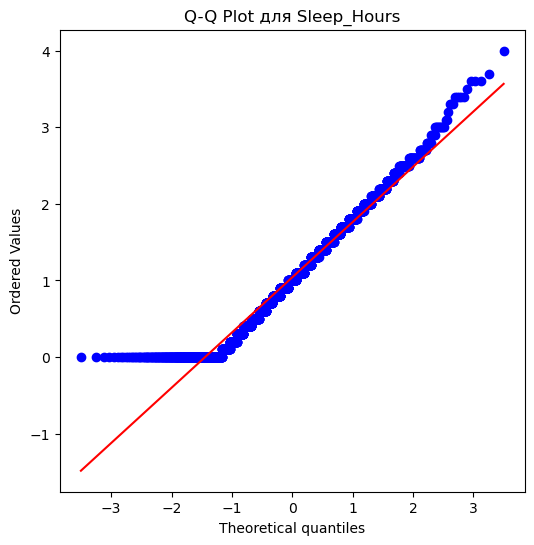

In [7]:
# II.3 Q-Q plot
import matplotlib.pyplot as plt
import scipy.stats as stats

def q_q_plot(numbers):
    plt.figure(figsize=(6, 6))
    stats.probplot(numbers, dist="norm", plot=plt)
    plt.title("Q-Q Plot для Sleep_Hours")
    plt.show()

q_q_plot(col)    


χ²-критерий: p-value = 0 → данные не нормальны.

Критерий асимметрии/эксцесса: асимметрия = 0, эксцесс существенно < 0 → тоже не нормальность.

Q-Q plot: точки отклоняются от диагонали в хвостах → подтверждает вывод тестов.

Вывод: данные не соответствуют нормальному распределению.

Размер исходных данных: 3000
Размер после удаления выбросов: 2983
Среднее                  : 1.0270533020449213
Дисперсия                : 0.5097541242538502
Мода                     : [0.]
Медиана                  : 1.0
Квантиль 0.25            : 0.4
Квантиль 0.5             : 1.0
Квантиль 0.75            : 1.5
Эксцесс                  : -0.6407160135601595
Асимметрия               : 0.31846365246332575
Интерквартильный размах  : 1.1


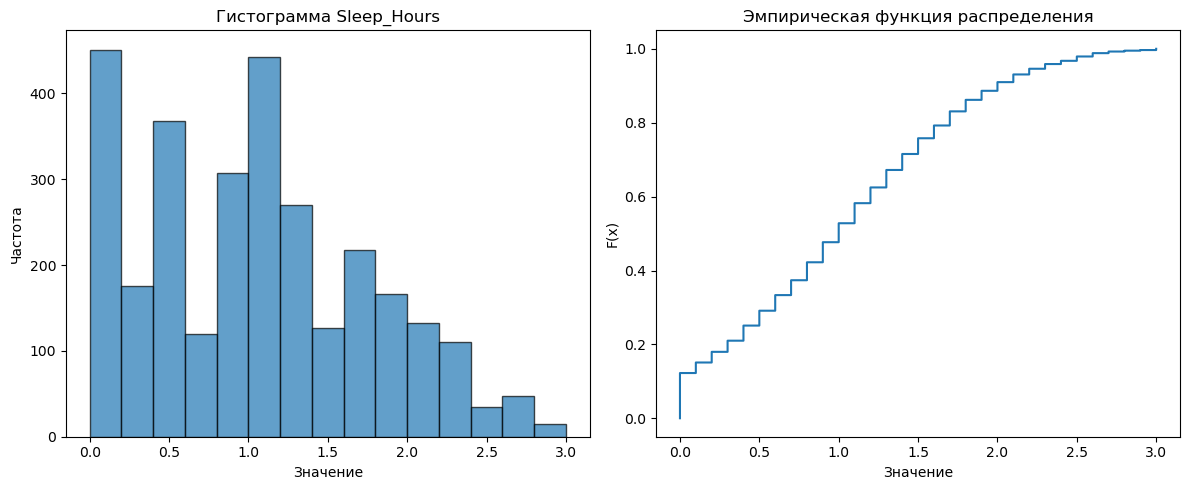

Хи-квадрат критерий
Статистика: 5284.703377393058
Степени свободы: 51
P-value: 0.0
Вывод: данные НЕ нормальны

Критерий асимметрии и эксцесса
Асимметрия: 0.31846365246332575, z-оценка: 7.100858740977049
Эксцесс: -0.6407160135601595, z-оценка: -7.1430976034173375
Вывод: данные НЕ нормальны


In [8]:
# III.1 Удаление выбросов методом IQR

def delete_all_emissions(numbers):
    Q1, Q3 = np.percentile(numbers, [25, 75])
    IQR = Q3 - Q1
    low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    
    col_no_outliers = numbers[(numbers >= low) & (numbers <= high)]
    
    print(f"Размер исходных данных: {len(col)}")
    print(f"Размер после удаления выбросов: {len(col_no_outliers)}")
    return col_no_outliers

col_no_outliers = delete_all_emissions(col)
task1(col_no_outliers)
task1_2(col_no_outliers)
task2(col_no_outliers)


Размер исходных данных: 3000
Размер после удаления выбросов: 3000
Среднее                  : -9.059419880941278e-16
Дисперсия                : 1.0
Мода                     : [-0.26146321]
Медиана                  : 0.006864722823636601
Квантиль 0.25            : -0.6639550970757939
Квантиль 0.5             : 0.006864722823636601
Квантиль 0.75            : 0.6776845427230672
Эксцесс                  : -0.2969486466071465
Асимметрия               : 0.011848322655815632
Интерквартильный размах  : 1.3416396397988612


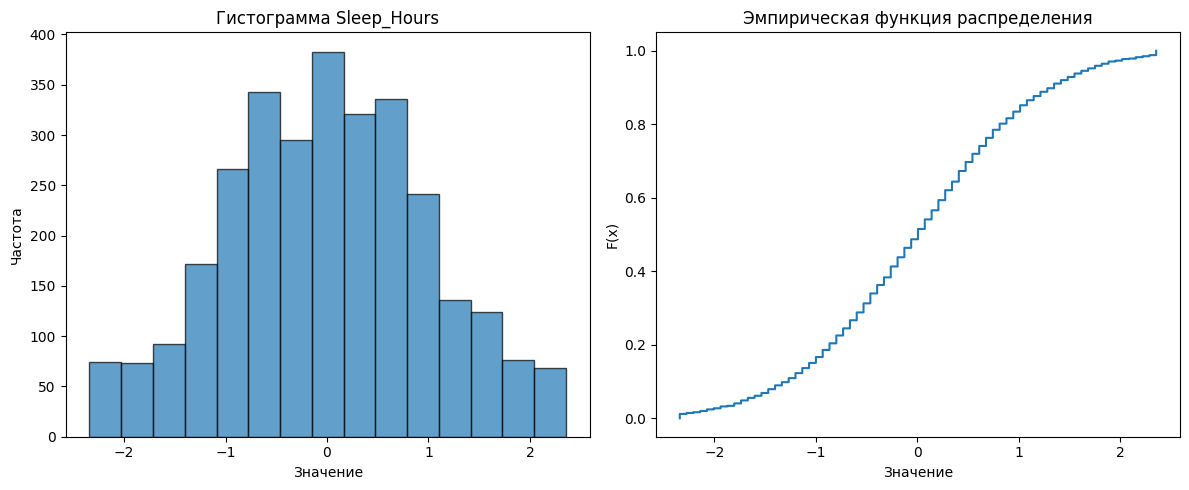

Хи-квадрат критерий
Статистика: 773.3591650090167
Степени свободы: 51
P-value: 0.0
Вывод: данные НЕ нормальны

Критерий асимметрии и эксцесса
Асимметрия: 0.011848322655815632, z-оценка: 0.26493654877754597
Эксцесс: -0.2969486466071465, z-оценка: -3.319986798200709
Вывод: данные НЕ нормальны


In [39]:
col_std = (col_no_outliers - np.mean(col_no_outliers)) / np.std(col_no_outliers, ddof=1)
col_std = delete_all_emissions(col_std)
task1(col_std)
task1_2(col_std)
task2(col_std)


Размер исходных данных: 3000
Размер после удаления выбросов: 2983
Среднее                  : 0.6405130385552226
Дисперсия                : 0.13831679527539803
Мода                     : [0.]
Медиана                  : 0.6931471805599453
Квантиль 0.25            : 0.33647223662121295
Квантиль 0.5             : 0.6931471805599453
Квантиль 0.75            : 0.9162907318741551
Эксцесс                  : -0.9001992653919872
Асимметрия               : -0.2873797222437714
Интерквартильный размах  : 0.5798184952529422


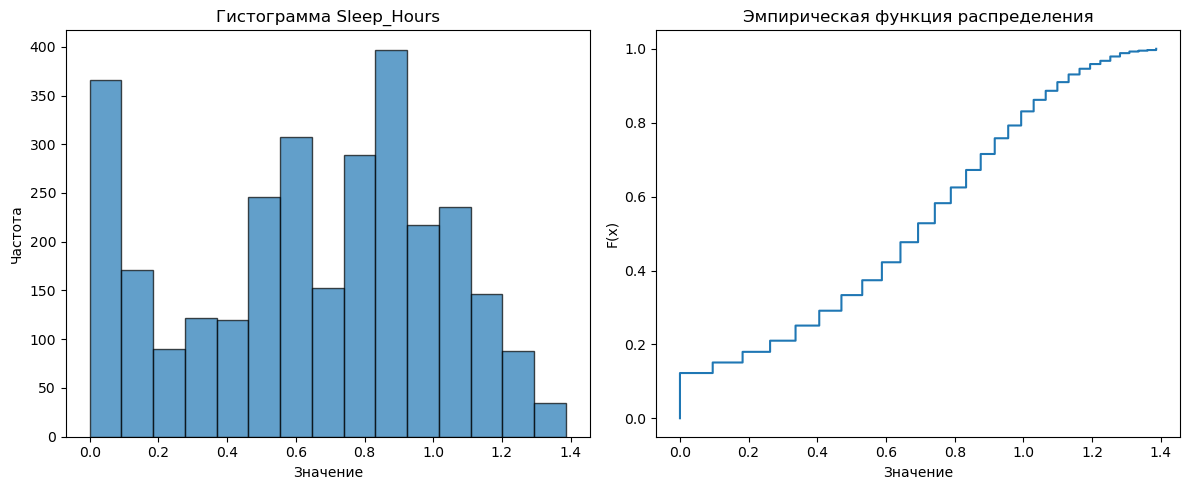

Хи-квадрат критерий
Статистика: 8525.233085894206
Степени свободы: 51
P-value: 0.0
Вывод: данные НЕ нормальны

Критерий асимметрии и эксцесса
Асимметрия: -0.2873797222437714, z-оценка: -6.40777305946788
Эксцесс: -0.9001992653919872, z-оценка: -10.035977061802893
Вывод: данные НЕ нормальны


In [9]:
# III.3 Логарифмирование
col_log = np.log1p(col_no_outliers)  # log(1+x), чтобы избежать проблем с 0
col_log2 = delete_all_emissions(col_log)
task1(col_log2)
task1_2(col_log2)
task2(col_log2)


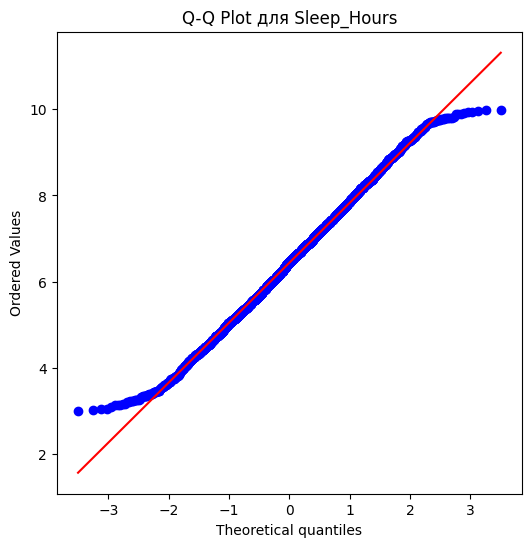

Хи-квадрат критерий
Статистика: 65.85651603365702
Степени свободы: 51
P-value: 0.07882506086260777
Вывод: данные близки к нормальному распределению

Критерий асимметрии и эксцесса
Асимметрия: 0.05424411308899242, z-оценка: 1.2129352424617315
Эксцесс: -0.38344610039257976, z-оценка: -4.287057730925086
Вывод: данные НЕ нормальны


In [41]:
from scipy.stats import truncnorm

mu, sigma = col.mean(), col.std()

a, b = (3 - mu) / sigma, (10 - mu) / sigma
trunc_data = truncnorm.rvs(a, b, loc=mu, scale=sigma, size=len(col))

q_q_plot(trunc_data)
task2(trunc_data)


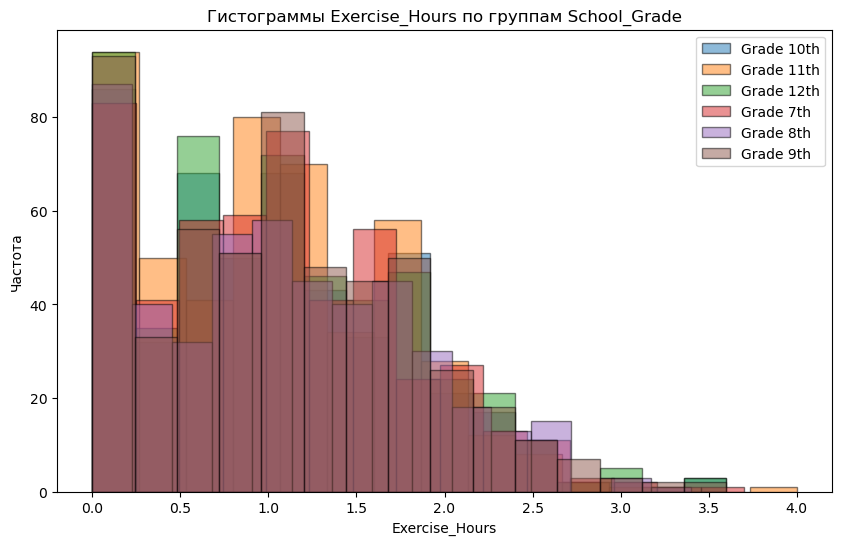

In [12]:
# IV.1 Гистограммы для каждой группы School_Grade на одном графике
import matplotlib.pyplot as plt

groups = df.groupby("School_Grade")["Exercise_Hours"]

plt.figure(figsize=(10,6))
for grade, values in groups:
    plt.hist(values, bins=15, alpha=0.5, label=f"Grade {grade}", edgecolor="black")

plt.title("Гистограммы Exercise_Hours по группам School_Grade")
plt.xlabel("Exercise_Hours")
plt.ylabel("Частота")
plt.legend()
plt.show()



In [14]:
# IV.2 Среднее и дисперсия внутри каждой группы
group_stats = groups.agg(["mean", "var"])
print(group_stats)

                  mean       var
School_Grade                    
10th          1.042505  0.536523
11th          0.979541  0.486652
12th          1.045936  0.564155
7th           1.029577  0.532410
8th           1.062033  0.551674
9th           1.080228  0.561665


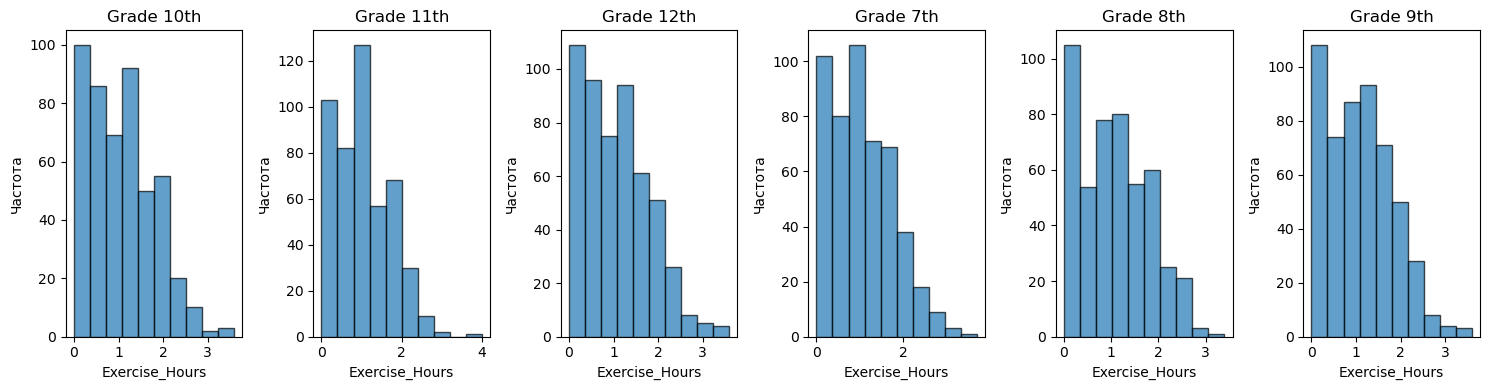

In [13]:
# IV.1b Отдельные гистограммы для каждого School_Grade рядом
grades = df["School_Grade"].unique()
grades_sorted = sorted(grades)

plt.figure(figsize=(15, 4))

for i, grade in enumerate(grades_sorted, 1):
    plt.subplot(1, len(grades_sorted), i)
    values = df[df["School_Grade"] == grade]["Exercise_Hours"]
    plt.hist(values, bins=10, edgecolor="black", alpha=0.7)
    plt.title(f"Grade {grade}")
    plt.xlabel("Exercise_Hours")
    plt.ylabel("Частота")

plt.tight_layout()
plt.show()


Группировка по School_Grade

Средние значения занятий по классам: от 0.97 ч (11-й класс) до 1.08 ч (9-й класс).

Дисперсии близки (0.48–0.56), различия небольшие.

Гистограммы по группам схожи: форма имеет крен влева, что характерно для всех классов.

8-й класс выделяется наибольшим средним, 12-й класс наибольшим разбросом.

Вывод: распределения в группах схожи.